# Demonstrating that crowd agreement percentage is a good indicator of question clarity

2015-06-30 Tong Shu Li

We saw in figure 2 that the crowd is more likely to choose the correct published EU-ADR answer if three of three experts agreed upon the published answer. We concluded that expert-interannotator agreement is a good measure of how clear a question is according to a specific set of annotation guidelines.

In this notebook we now want to show that crowd agreement is an equally good indicator of how clear a question is.

**Assumption**: expert inter-annotator agreement is a good indicator of how clear a question is.

**Claim**: Crowd agreement is just as good of an indicator of question clarity as expert inter-annotator agreement.

**Proof**: We will plot the chance that the top chosen crowd answer matches the published EU-ADR answer as a function of crowd agreement upon the top choice.

In [1]:
from __future__ import division
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from src.filter_data import filter_data
from src.true_relation_type import get_euadr_relation_type
from src.broad_reltype_performance import determine_broad_reltype_results

---

###Read the results of the CrowdFlower job:

In [3]:
settings = {
    "loc": "data",
    "fname": "job_710587_full_with_untrusted_id.tsv",
    "data_subset": "normal",
    "min_accuracy": 0.7,
    "max_accuracy": 1.0,
    "categories": [["positive"], ["false"], ["negative"], ["speculative"]]
}

raw_data = filter_data(settings)

/usr/lib64/python2.7/site-packages/pandas/core/indexing.py:407: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [4]:
euadr_answer = get_euadr_relation_type(settings)

In [5]:
len(raw_data)

600

###Aggregate the results:

In [6]:
results = determine_broad_reltype_results(euadr_answer, raw_data)

In [7]:
results.head()

,unit_id,broad_rel_type,conf_score,num_votes,percent_agreement,match
1,698757970,positive,6.8960,8,0.808280,0
0,698757970,false,0.8500,1,0.099628,1
2,698757970,speculative,0.7857,1,0.092092,0
1,698757972,negative,3.5375,4,0.403552,0
2,698757972,positive,2.7802,3,0.317161,0


### Map the CrowdFlower unit ids back to their published relationship ids:

In [8]:
unit_id_to_rel_id = dict()
for unit_id, group in raw_data.groupby("_unit_id"):
    assert len(group["pub_rel_id"].unique()) == 1
    unit_id_to_rel_id[unit_id] = group["pub_rel_id"].iloc[0]

---

### Grab the top crowd choice for each question:

In [9]:
temp = [group.iloc[0] for unit_id, group in results.groupby("unit_id")]

top_choices = pd.concat(temp, axis = 1).transpose()

top_choices["percent_agreement"] = top_choices["percent_agreement"].astype(float)

top_choices = top_choices.sort("percent_agreement")

In [10]:
top_choices

,unit_id,broad_rel_type,conf_score,num_votes,percent_agreement,match
1,698757972,negative,3.5375,4,0.403552,0
2,698757986,positive,3.5699,4,0.404274,1
1,698757988,positive,3.5266,4,0.409346,1
2,698757991,positive,4.5302,5,0.497551,0
1,698758006,negative,4.389,5,0.498665,0
2,698757981,positive,4.3905,5,0.498835,1
0,698758020,positive,4.5643,5,0.501296,0
1,698757992,positive,4.3875,5,0.511340,1
0,698758014,false,4.2872,5,0.514293,0
1,698758026,speculative,4.5405,5,0.518210,0


###The chance that the crowd got the correct answer when the top choice is below a certain threshold:

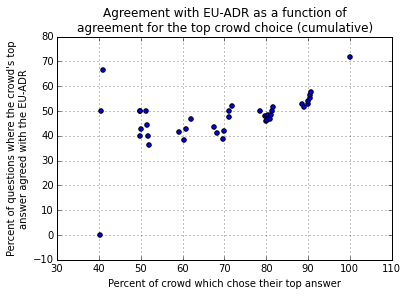

In [11]:
temp = defaultdict(list)
for threshold in top_choices["percent_agreement"].unique():
    EPSILON = float(0.0000001)
    sub = top_choices.query("percent_agreement < {0} or -{1} <= percent_agreement - {0} <= {1}".format(threshold, EPSILON))
    
    temp["percent_agree"].append(threshold * 100)
    temp["percent_match"].append(sum(sub["match"]) / len(sub) * 100)
    
ax = pd.DataFrame(temp).plot(kind = "scatter", x = "percent_agree", y = "percent_match",
                            title = "Agreement with EU-ADR as a function of\nagreement for the top crowd choice (cumulative)")

ax.set_xlabel("Percent of crowd which chose their top answer")
ax.set_ylabel("Percent of questions where the crowd's top\nanswer agreed with the EU-ADR")    

###We can also group the results in ranges:

In [12]:
temp = defaultdict(list)
for lower in range(0, 10):
    upper = lower + 1
    sub = top_choices.query("{0} <= percent_agreement <= {1}".format(lower / 10, upper / 10))
    if len(sub) == 0:
        continue
        
    print "There are {0} questions where the top choice was between {1}% and {2}% agreement.".format(len(sub), lower * 10, upper * 10)
    
    temp["lower"].append(lower * 10)
    temp["percent_right"].append(sum(sub["match"]) / len(sub) * 100)

There are 6 questions where the top choice was between 40% and 50% agreement.
There are 6 questions where the top choice was between 50% and 60% agreement.
There are 7 questions where the top choice was between 60% and 70% agreement.
There are 7 questions where the top choice was between 70% and 80% agreement.
There are 11 questions where the top choice was between 80% and 90% agreement.
There are 23 questions where the top choice was between 90% and 100% agreement.


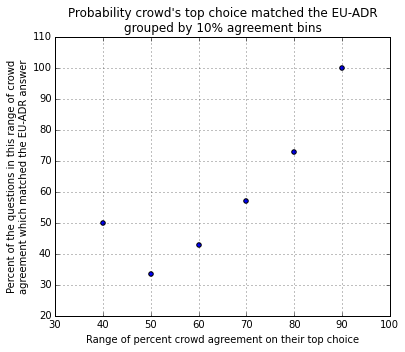

In [13]:
ax = pd.DataFrame(temp).plot(kind = "scatter", x = "lower", y = "percent_right",
                            title = "Probability crowd's top choice matched the EU-ADR\ngrouped by 10% agreement bins",
                            figsize = (6, 5))

ax.set_xlabel("Range of percent crowd agreement on their top choice")
ax.set_ylabel("Percent of the questions in this range of crowd\nagreement which matched the EU-ADR answer")

Based on the two graphs above, we see that our crowd is more likely to agree with the EU-ADR as the crowd's internal agreement increases.